In [1]:
import pandas as pd
import numpy as np
import math
import json
import csv

In [2]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)

In [3]:
discount_file = pd.read_csv (r'./modified data/discount_file.csv')

In [4]:
discount_file

,customer_id,gender,income,membership_days,offer_id,offer_type,offer_received,offer_viewed,offer_completed,transaction,...,20-45,46-60,Above 60,Male,Female,income_group,Under 30000,30000-60000,60000-90000,Above 90000
0,e2127556f4f64592b11af22de27a7932,M,70000.0,945 days 00:00:00.000000000,2906b810c7d4411798c6938adc9daaa5,discount,1,0,0,0,...,0,0,1,1,0,60000-90000,0,0,1,0
1,aa4862eba776480b8bb9c68455b8c2e1,F,57000.0,1172 days 00:00:00.000000000,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,0,...,0,0,1,0,1,30000-60000,0,1,0,0
2,31dda685af34476cad5bc968bdb01c53,F,71000.0,1750 days 00:00:00.000000000,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,0,...,0,0,1,0,1,60000-90000,0,0,1,0
3,f806632c011441378d4646567f357a21,M,69000.0,2664 days 00:00:00.000000000,fafdcd668e3743c1bb461111dcafc2a4,discount,1,0,0,0,...,1,0,0,1,0,60000-90000,0,0,1,0
4,d058f73bf8674a26a95227db098147b1,F,88000.0,943 days 00:00:00.000000000,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,1,0,0,0,...,0,1,0,0,1,60000-90000,0,0,1,0
5,9f30b375d7bd4c62a884ffe7034e09ee,F,63000.0,1202 days 00:00:00.000000000,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,1,0,0,0,...,1,0,0,0,1,60000-90000,0,0,1,0
6,9c64321646bf40f6ad1bc98864eaa6b8,F,53000.0,1504 days 00:00:00.000000000,fafdcd668e3743c1bb461111dcafc2a4,discount,1,0,0,0,...,0,1,0,0,1,30000-60000,0,1,0,0
7,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,M,96000.0,1775 days 00:00:00.000000000,2906b810c7d4411798c6938adc9daaa5,discount,1,0,0,0,...,1,0,0,1,0,Above 90000,0,0,0,1
8,ca82e1ebc759402c8ab95c341755bdf1,M,56000.0,867 days 00:00:00.000000000,2906b810c7d4411798c6938adc9daaa5,discount,1,0,0,0,...,0,0,1,1,0,30000-60000,0,1,0,0
9,2e87ba0fba1a4d1a8614af771f07a94d,M,76000.0,1369 days 00:00:00.000000000,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,1,0,0,0,...,0,0,1,1,0,60000-90000,0,0,1,0


In [5]:
discount_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57262 entries, 0 to 57261
Data columns (total 32 columns):
customer_id        57262 non-null object
gender             57262 non-null object
income             57262 non-null float64
membership_days    57262 non-null object
offer_id           57262 non-null object
offer_type         57262 non-null object
offer_received     57262 non-null int64
offer_viewed       57262 non-null int64
offer_completed    57262 non-null int64
transaction        57262 non-null int64
amount             0 non-null float64
time               57262 non-null int64
duration           57262 non-null float64
difficulty         57262 non-null float64
channels           57262 non-null object
reward             57262 non-null float64
web                57262 non-null float64
social             57262 non-null float64
mobile             57262 non-null float64
email              57262 non-null float64
Age_group          57262 non-null object
Under 20           57262 non-n

In [6]:
portfolio

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [7]:
#to identify which type of discount offer
def discount_type(offer_id,offer_type):
    for index, row in discount_file.iterrows():
        if row['offer_id'] == '0b1e1539f2cc45b7b9fa7c272da2e1d7':
            discount_file.loc[index,'exact_offer'] = "discount_1"
                
        elif row['offer_id'] == '2298d6c36e964ae4a3e7e9706d1fb8c2' :
            discount_file.loc[index,'exact_offer'] = "discount_2"
        
        elif row['offer_id'] == 'fafdcd668e3743c1bb461111dcafc2a4' :
            discount_file.loc[index,'exact_offer'] = "discount_3"
                
        else :
            discount_file.loc[index,'exact_offer']="discount_4"

In [8]:
discount_type(discount_file['offer_id'], discount_file['offer_type'])

In [10]:
#split discount file into 4 different discount offer types
discount_type1 = discount_file[discount_file['exact_offer']=='discount_1'].copy()
discount_type2 = discount_file[discount_file['exact_offer']=='discount_2'].copy()
discount_type3 = discount_file[discount_file['exact_offer']=='discount_3'].copy()
discount_type4 = discount_file[discount_file['exact_offer']=='discount_4'].copy()

In [11]:
import csv
discount_type1.to_csv('./modified data/discount_type1.csv', index=False)
discount_type2.to_csv('./modified data/discount_type2.csv', index=False)
discount_type3.to_csv('./modified data/discount_type3.csv', index=False)
discount_type4.to_csv('./modified data/discount_type4.csv', index=False)

In [17]:
#discount_type1.info()

In [18]:
#discount_type2.info()

In [19]:
#discount_type3.info()

In [ ]:
#discount_type4.info()

In [ ]:
#discount_file.info()

In [ ]:
#to categorise the customer on the bases of his resonse

In [23]:
def customer_discount1 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in discount_type1.iterrows():
        if row['exact_offer'] == 'discount_1':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_discount1")
                discount_type1.loc[index,'Category'] = "effective_discount1"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_discount1")
                discount_type1.loc[index,'Category'] = "interested_discount1"
                
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_discount1")
                discount_type1.loc[index,'Category'] = "interested_discount1"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_discount1")
                discount_type1.loc[index,'Category'] = "interested_discount1"
                
        
            else :
                #print ("ineffective_discount1")
                discount_type1.loc[index,'Category']="ineffective_discount1"
                

In [24]:
customer_discount1(discount_type1['exact_offer'],discount_type1['offer_received'],discount_type1['offer_viewed'],discount_type1['offer_completed'])

In [26]:
#discount_type1

In [28]:
#discount_type1.info()

In [29]:
def customer_discount2 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in discount_type2.iterrows():
        if row['exact_offer'] == 'discount_2':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_discount2")
                discount_type2.loc[index,'Category'] = "effective_discount2"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_discount2")
                discount_type2.loc[index,'Category'] = "interested_discount2"
                
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_discount2")
                discount_type2.loc[index,'Category'] = "interested_discount2"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_discount2")
                discount_type2.loc[index,'Category'] = "interested_discount2"
                
        
            else :
                #print ("ineffective_discount2")
                discount_type2.loc[index,'Category']="ineffective_discount2"
                

In [30]:
customer_discount2(discount_type2['exact_offer'],discount_type2['offer_received'],discount_type2['offer_viewed'],discount_type2['offer_completed'])

In [33]:
#discount_type2

In [34]:
#discount_type2.info()

In [35]:
def customer_discount3 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in discount_type3.iterrows():
        if row['exact_offer'] == 'discount_3':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_discount3")
                discount_type3.loc[index,'Category'] = "effective_discount3"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_discount3")
                discount_type3.loc[index,'Category'] = "interested_discount3"
                
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_discount3")
                discount_type3.loc[index,'Category'] = "interested_discount3"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_discount3")
                discount_type3.loc[index,'Category'] = "interested_discount3"
                
        
            else :
                #print ("ineffective_discount3")
                discount_type3.loc[index,'Category']="ineffective_discount3"
                

In [36]:
customer_discount3(discount_type3['exact_offer'],discount_type3['offer_received'],discount_type3['offer_viewed'],discount_type3['offer_completed'])

In [39]:
#discount_type3

In [40]:
#discount_type3.info()

In [41]:
def customer_discount4 (exact_offer,offer_received,offer_viewed,offer_completed):
    for index, row in discount_type4.iterrows():
        if row['exact_offer'] == 'discount_4':
            if row['offer_received'] == 1 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print("effective_discount4")
                discount_type4.loc[index,'Category'] = "effective_discount4"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 0 and row['offer_completed'] == 1 :
                #print ("interested_discount4")
                discount_type4.loc[index,'Category'] = "interested_discount4"
                
        
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 1 :
                #print ("interested_discount4")
                discount_type4.loc[index,'Category'] = "interested_discount4"
                
                
            elif row['offer_received'] == 0 and row['offer_viewed'] == 1 and row['offer_completed'] == 0 :
                #print ("interested_discount4")
                discount_type4.loc[index,'Category'] = "interested_discount4"
                
        
            else :
                #print ("ineffective_discount4")
                discount_type4.loc[index,'Category']="ineffective_discount4"
                

In [42]:
customer_discount4(discount_type4['exact_offer'],discount_type4['offer_received'],discount_type4['offer_viewed'],discount_type4['offer_completed'])

In [90]:
#discount_type4

In [46]:
#discount_type4.info()

In [47]:
#join the discount files
discount_alltypes = discount_type1.append([discount_type2, discount_type3,discount_type4])

In [48]:
discount_alltypes.to_csv('./modified data/discount_alltypes.csv',index=False)

In [49]:
discount_alltypes = pd.read_csv (r'./modified data/discount_alltypes.csv')

DATA VISUALISATION OF DISCOUNT OFFERS

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
discount_alltypes = pd.read_csv (r'./modified data/discount_alltypes.csv')

In [3]:
plot_gender = discount_alltypes[discount_alltypes['gender'] != 'O']

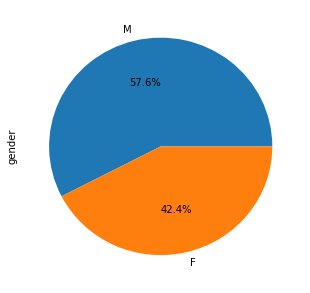

In [4]:
plot_gender.gender.value_counts().plot(kind='pie' , figsize=(5, 5), autopct='%1.1f%%')

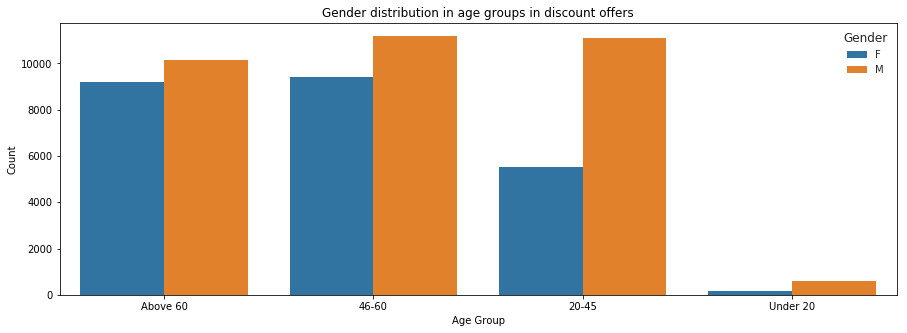

In [53]:
#Gender distribution in age groups in discount offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "Category", hue= "gender", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Gender distribution in age groups in discount offers')
plt.ylabel('Gender')
plt.xlabel('Category')
plt.legend(title='Gender')

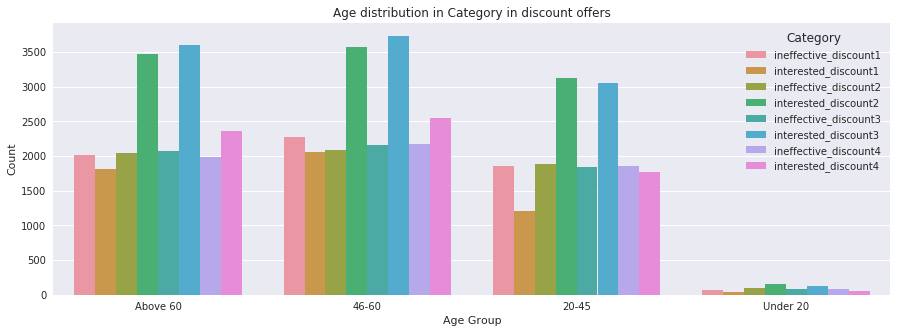

In [54]:
#Age distribution in Category in discount offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "Age_group", hue= "Category", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Age distribution in Category in discount offers')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.legend(title='Category')

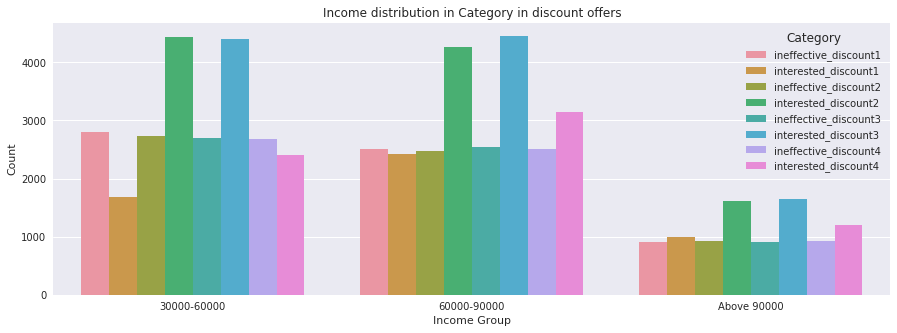

In [55]:
#Income distribution in Category in discount offers
plt.figure(figsize=(15, 5))
sns.countplot(x= "income_group", hue= "Category", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Income distribution in Category in discount offers')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Category')

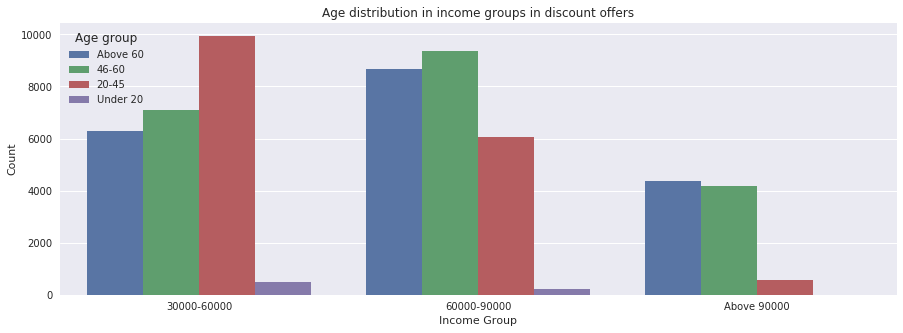

In [56]:
#'Age distribution in income groups in discount offers'
plt.figure(figsize=(15, 5))
sns.countplot(x= "income_group", hue= "Age_group", data=plot_gender)
sns.set(style="darkgrid")
plt.title('Age distribution in income groups in discount offers')
plt.ylabel('Count')
plt.xlabel('Income Group')
plt.legend(title='Age group')

In [57]:
def send_discount1(exact_offer,Category):
    for index, row in discount_alltypes.iterrows():
        if row['exact_offer'] == 'discount_1':
            if row['Category'] == 'effective_discount1' :
                discount_alltypes.loc[index,'send_discount1'] = 1
                
            elif row['Category'] == 'interested_discount1' :
                discount_alltypes.loc[index,'send_discount1'] = 1
               
            else :
                discount_alltypes.loc[index,'send_discount1'] = 0
                
        else :
            discount_alltypes.loc[index,'send_discount1'] = 0
            

In [58]:
send_discount1(discount_alltypes['exact_offer'],discount_alltypes['Category'])

In [59]:
def send_discount2(exact_offer,Category):
    for index, row in discount_alltypes.iterrows():
        if row['exact_offer'] == 'discount_2':
            if row['Category'] == 'effective_discount2' :
                discount_alltypes.loc[index,'send_discount2'] = 1
                
            elif row['Category'] == 'interested_discount2' :
                discount_alltypes.loc[index,'send_discount2'] = 1
               
            else :
                discount_alltypes.loc[index,'send_discount2'] = 0
                
        else :
            discount_alltypes.loc[index,'send_discount2'] = 0
            

In [60]:
send_discount2(discount_alltypes['exact_offer'],discount_alltypes['Category'])

In [61]:
def send_discount3(exact_offer,Category):
    for index, row in discount_alltypes.iterrows():
        if row['exact_offer'] == 'discount_3':
            if row['Category'] == 'effective_discount3' :
                discount_alltypes.loc[index,'send_discount3'] = 1
                
            elif row['Category'] == 'interested_discount3' :
                discount_alltypes.loc[index,'send_discount3'] = 1
               
            else :
                discount_alltypes.loc[index,'send_discount3'] = 0
                
        else :
            discount_alltypes.loc[index,'send_discount3'] = 0
            

In [62]:
send_discount3(discount_alltypes['exact_offer'],discount_alltypes['Category'])

In [63]:
def send_discount4(exact_offer,Category):
    for index, row in discount_alltypes.iterrows():
        if row['exact_offer'] == 'discount_4':
            if row['Category'] == 'effective_discount4' :
                discount_alltypes.loc[index,'send_discount4'] = 1
                
            elif row['Category'] == 'interested_discount4' :
                discount_alltypes.loc[index,'send_discount4'] = 1
               
            else :
                discount_alltypes.loc[index,'send_discount4'] = 0
                
        else :
            discount_alltypes.loc[index,'send_discount4'] = 0
            

In [64]:
send_discount4(discount_alltypes['exact_offer'],discount_alltypes['Category'])

In [67]:
#discount_alltypes

In [68]:
#discount_alltypes.info()

In [69]:
discount_send=discount_alltypes.copy()

In [70]:
discount_send.to_csv('./modified data/discount_send',index=False)

In [71]:
def offer_category(exact_offer):
    for index, row in discount_send.iterrows():
        if row['exact_offer'] == 'discount_1':
            discount_send.loc[index,'offer_category'] = 5

        elif row['exact_offer'] == 'discount_2' :
            discount_send.loc[index,'offer_category'] = 6
        
        elif row['exact_offer'] == 'discount_3' :
            discount_send.loc[index,'offer_category'] = 7
                
        else :
            discount_send.loc[index,'offer_category'] = 8

In [72]:
offer_category(discount_send['exact_offer'])

In [74]:
#discount_send

In [75]:
discount_category=discount_send.copy()

In [76]:
discount_category.to_csv('./modified data/discount_category.csv',index=False)

In [ ]:
#discount_category = pd.read_csv (r'./modified data/discount_category.csv')

In [78]:
#discount_category.info()

In [79]:
discount_category=discount_category.drop('offer_received',axis=1)
discount_category=discount_category.drop('offer_completed',axis=1)
discount_category=discount_category.drop('offer_viewed',axis=1)

In [80]:
discount_category=discount_category.drop('transaction',axis=1)
discount_category=discount_category.drop('amount',axis=1)

In [81]:
discount_category=discount_category.drop('gender',axis=1)
discount_category=discount_category.drop('Age_group',axis=1)
discount_category=discount_category.drop('income',axis=1)
discount_category=discount_category.drop('income_group',axis=1)

In [82]:
discount_category=discount_category.drop('exact_offer',axis=1)
discount_category=discount_category.drop('duration',axis=1)
discount_category=discount_category.drop('difficulty',axis=1)
discount_category=discount_category.drop('reward',axis=1)
discount_category=discount_category.drop('channels',axis=1)

In [83]:
discount_category=discount_category.drop('offer_id',axis=1)
discount_category=discount_category.drop('offer_type',axis=1)

In [84]:
discount_category=discount_category.drop('time',axis=1)
discount_category=discount_category.drop('Category',axis=1)

In [85]:
discount_category=discount_category.drop('membership_days',axis=1)
#assume membership days donot influence the category
discount_category=discount_category.drop('customer_id',axis=1)

In [86]:
discount_category

,web,social,mobile,email,Under 20,20-45,46-60,Above 60,Male,Female,Under 30000,30000-60000,60000-90000,Above 90000,send_discount1,send_discount2,send_discount3,send_discount4,offer_category
0,1.0,0.0,0.0,1.0,0,0,0,1,0,1,0,1,0,0,0.0,0.0,0.0,0.0,5.0
1,1.0,0.0,0.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,5.0
2,1.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0,5.0
3,1.0,0.0,0.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,5.0
4,1.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,1,0,0.0,0.0,0.0,0.0,5.0
5,1.0,0.0,0.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,0.0,0.0,5.0
6,1.0,0.0,0.0,1.0,0,0,1,0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,5.0
7,1.0,0.0,0.0,1.0,0,0,1,0,1,0,0,0,0,1,0.0,0.0,0.0,0.0,5.0
8,1.0,0.0,0.0,1.0,0,0,1,0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,5.0
9,1.0,0.0,0.0,1.0,0,0,0,1,1,0,0,0,1,0,0.0,0.0,0.0,0.0,5.0


In [87]:
discount_final=discount_category.copy()

In [91]:
discount_final.to_csv('./modified data/discount_final.csv',index=False)

MODEL EVALUATION

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB   
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
import pandas as pd
import numpy as np

In [10]:
import csv
discount_final = pd.read_csv (r'./modified data/discount_final.csv')

In [11]:
#spliting testing and training data
data = discount_final.drop(['offer_category'], axis=1)
label = discount_final['offer_category']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3, random_state = 0)

DTC: 0.803598 (0.176531)
KNN: 0.803528 (0.178647)
RF: 0.803563 (0.176527)
LR: 0.802148 (0.177515)
GNB: 0.808872 (0.176638)
SVM: 0.802410 (0.177097)


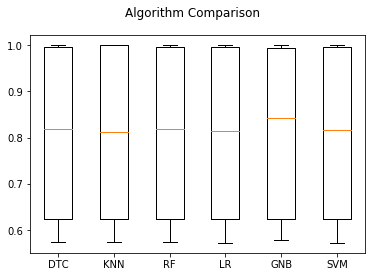

In [19]:
#model comparision
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset

data = discount_final.drop(['offer_category'], axis=1)
label = discount_final['offer_category']
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier ()))
models.append(('LR', LogisticRegression()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, data, label, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB(priors=None)

In [14]:
y_pred = GNB.predict(X_test)

print(y_pred[:15])
print(y_test[:15])


[ 8.  6.  6.  5.  5.  5.  7.  5.  6.  7.  7.  6.  7.  8.  6.]
56592    8.0
18035    6.0
20285    6.0
8785     5.0
9285     5.0
2458     5.0
41040    7.0
8156     5.0
18476    6.0
19742    6.0
22920    6.0
21681    6.0
24865    6.0
51542    8.0
15177    6.0
Name: offer_category, dtype: float64


In [15]:
X_test.head(15)

,web,social,mobile,email,Under 20,20-45,46-60,Above 60,Male,Female,Under 30000,30000-60000,60000-90000,Above 90000,send_discount1,send_discount2,send_discount3,send_discount4
56592,1.0,0.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,0.0,1.0
18035,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0,1,0,0,0.0,1.0,0.0,0.0
20285,1.0,1.0,1.0,1.0,0,1,0,0,1,0,0,1,0,0,0.0,1.0,0.0,0.0
8785,1.0,0.0,0.0,1.0,0,0,1,0,0,1,0,1,0,0,1.0,0.0,0.0,0.0
9285,1.0,0.0,0.0,1.0,0,1,0,0,0,1,0,1,0,0,0.0,0.0,0.0,0.0
2458,1.0,0.0,0.0,1.0,0,1,0,0,1,0,0,1,0,0,0.0,0.0,0.0,0.0
41040,1.0,1.0,1.0,1.0,0,0,0,1,0,1,0,0,1,0,0.0,0.0,1.0,0.0
8156,1.0,0.0,0.0,1.0,0,0,1,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0
18476,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0,0,1,0.0,1.0,0.0,0.0
19742,1.0,1.0,1.0,1.0,0,0,1,0,0,1,0,0,1,0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(Y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    print(conf_mat)
    fig = plt.figure(figsize=(6,6))
    plt.matshow(conf_mat, cmap=plt.cm.Blues, fignum=1)
    plt.yticks(range(4), range(4))
    plt.xticks(range(4), range(4))
    plt.colorbar();
    for i in range(4):
        for j in range(4):
            plt.text(i-0.2,j+0.1, str(conf_mat[j, i]), color='tab:red')

[[3412    0    0    0]
 [   0 3194 1742    0]
 [   0  113 4919    0]
 [   0    0    0 3799]]


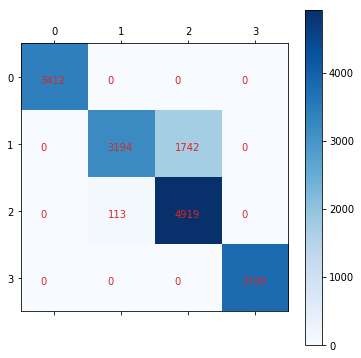

In [21]:
plot_confusion_matrix(y_test, GNB.predict(X_test))

Gaussian Naive Base is the recommended model for the discount offers

In [ ]:
################################################################################################################################3